# Single Model Uses

This notebook shows some uses of the forced baroptric model with singel model runs. See examples/ensemble for uses as it pertains to ensembles of runs

In [1]:
# This directive tells the notebook to add interactive plots in the notebook
#%matplotlib widget
#%matplotlib
import sys
sys.path.append('../src')  # Add the 'src' directory to the Python path
from model.solver import Solver #bm3_barotropic_model packages
from model.sphere import Sphere
from utils import constants, plotting, parcel_tracking, animations

import time
import numpy as np
import random
import xarray as xr

import matplotlib.pyplot as plt    

from tqdm import tqdm
from importlib import reload

from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation

/home/bertossa/miniconda3/envs/jupyter/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We may simply integrate a single model and plot the resulting output at the final integration step

In [2]:
T= constants.day2sec*14 #total integration time

st = Sphere(M=63)
#st.add_seaice() # add sea ice field if you'd like, just adds a temp jump to equilibrium temp field.

##if we want to start with some structure in the vorticity here's some options
##otherwise, start at equilibrium conditions

#k0=3
#vortp = 1e-5 * np.exp( -0.5 * (st.glats - 45.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
#thetap = np.zeros(vortp.shape)
#st.set_ics([vortp,thetap])

params=dict(nu=1e-18, tau = 1/8, diffusion_order=4,dt=1800, ofreq=4,
            forcing_type='rededdy', vort_linear = False, temp_linear=False)

S = Solver(st, T= T, **params)

sln = S.integrate_dynamics(verbose=True)

100%|████████████████████████████████████████| 672/672 [00:03<00:00, 181.55it/s]


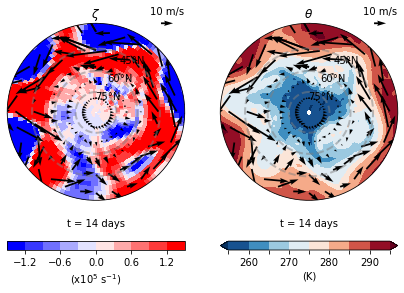

In [3]:
tidx=-1
f,ax = plotting.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1.5,1.5,11), np.arange(255,300,5)],
                              var=['vort','theta'])
#f.savefig('./singlerun.png',dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#careful..this takes quite a while to run. ~4s/frame
%matplotlib
starttime = time.time()
animations.overview_animation(sln, times = [0,T], xs=None, filename = './nonlinear.gif')
print('time taken to animate: ', time.time()-starttime)

### Tracking parcels
We can use a parcel tracking routine to help show spread growth

In [4]:
#dsr = sln.rename(dict(x='lon',y='lat')) #rename x,y to lon,lat
# Reassign longitude coordinates between -180 and 180E
#dsr = dsr.assign_coords(lon=(((dsr.lon + 180) % 360) - 180))
#dsr = dsr.sortby('lon')

x0 = [(-100., l) for l in np.linspace(45, 70, 4)] #initial position(s) of parcel
t0=0. #t0=(0,T)
ts, xs = parcel_tracking.calculate_trajectories(sln, x0, t0 = sln.time.isel(time=0).data)


Integrating 4 trajectories for [14.].
  1. From -100 E, 45 N at 0.0.
  2. From -100 E, 53.3333 N at 0.0.
  3. From -100 E, 61.6667 N at 0.0.
  4. From -100 E, 70 N at 0.0.


100%|█████████████████████████████████████████| 167/167 [00:46<00:00,  3.59it/s]

Completed 168 of 168 timesteps.


MovieWriter ffmpeg unavailable; using Pillow instead.


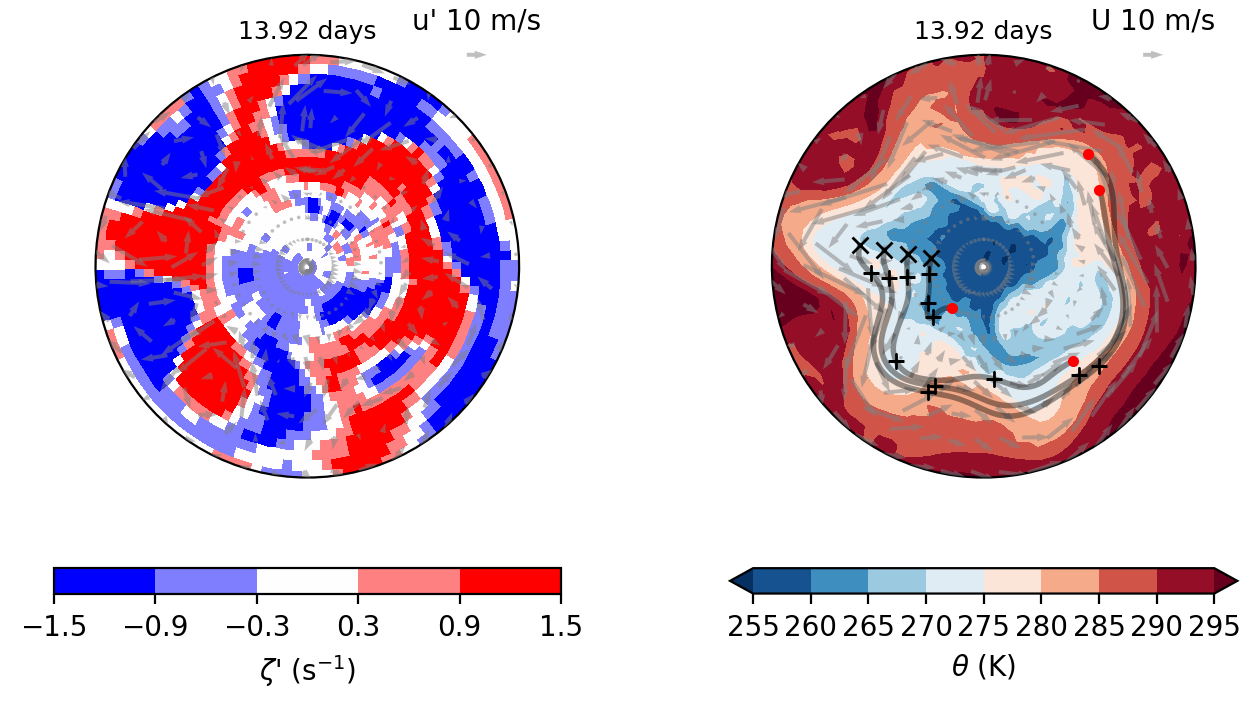

In [5]:
animations.overview_animation(sln, times = [0,T],filename = 'nonlinear_wtraj.gif', xs=xs,ts=ts)